## Assignment 1: Machine Learning Methods

### \Alex Nguyen \a1848722

#### How can we use health measurements to predict obesity
The dataset provided has two forms of direct/indirect obesity measures. The first is a categorisation (NObeyesdad). 
NObesity values are:
- Underweight Less than 18.5
- Normal 18.5 to 24.9
- Overweight 25.0 to 29.9
- Obesity I 30.0 to 34.9
- Obesity II 35.0 to 39.9
- Obesity III Higher than 40

The second can be done directly via Body Mass Index (BMI) which can be derived from height and weight (use your magical Google skills to find the formula).

The goal here is to do some data modelling to achieve the following:
- What recommendations would you make to the public to reduce the rate of obesity (backed by evidence)?

#### Metric Descriptions

Other provided metrics include:
Gender, Age

The attributes related with eating habits are: 
- Frequent consumption of high caloric food (FAVC)
- Frequency of consumption of vegetables (FCVC)
- Number of main meals (NCP)
- Consumption of food between meals (CAEC)
- Consumption of water daily (CH20)
- Consumption of alcohol (CALC).

The attributes related with the physical condition are: 
- Calories consumption monitoring (SCC)
- Physical activity frequency (FAF)
- Time using technology devices (TUE)
- Transportation used (MTRANS)

### 1. Read the dataset

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

obe = pd.read_csv('./ObesityDataSet.csv')
obe

Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE      CH2O  SCC       FAF       TUE  \
0      no   2.0  3.0  Sometimes    no  2.000000   no  0.000000  1.000000   
1      no   3.0  3.0  Sometimes   yes  3.000000  yes  3.000000  0.000000   
2      no   2.0  3.0  Sometimes    no  2.000000   no  2.000000  1.000000   
3      no   3.0  3.0  Sometimes    no  2.000000   no  2.000000  0.000000   
4      no   2.0  1.0  Sometimes    no  2.000000   no  0.000000  0.000000   
...   ...   ...  ...        ...   ...       ...  ...       ...       ...   
2106  yes   3.0  3.0  Sometimes    no  1.728139   no  1.676269  0.906247   
2107  yes   3.0  3.0  Sometimes    no  2.005130   no  1.341390  0.599270   
2108  yes   3.0  3.0  Sometimes    no  2.054193   no  1.414209  0.646288   
2109  yes   3.0  3.0  Sometimes    no  2.852339   no  1.139107  0.586035   
2110  yes   3.0  3.0  Sometimes    no  2.863513   no  1.026452  0.714137   

            CALC                 MTRANS           NObeyesdad  
0             no  Public_Transportation        Normal_Weight  
1      Sometimes  Public_Transportation        Normal_Weight  
2     Frequently  Public_Transportation        Normal_Weight  
3     Frequently                Walking   Overweight_Level_I  
4      Sometimes  Public_Transportation  Overweight_Level_II  
...          ...                    ...                  ...  
2106   Sometimes  Public_Transportation     Obesity_Type_III  
2107   Sometimes  Public_Transportation     Obesity_Type_III  
2108   Sometimes  Public_Transportation     Obesity_Type_III  
2109   Sometimes  Public_Transportation     Obesity_Type_III  
2110   Sometimes  Public_Transportation     Obesity_Type_III  

[2111 rows x 17 columns]

In [2]:
# Check variable names
obe.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

Many variables have labels hard to identify and intepret the data, so we rename the labels to analyse data easily.

In [3]:
rename_dict = {
    'Gender': 'gender',
    'Age': 'age',
    'Height': 'height',
    'Weight': 'weight',
    'family_history_with_overweight': 'family_overweight',
    'FAVC': 'high_caloric_consumption',
    'FCVC': 'veg_consumption',
    'NCP': 'number_meals',
    'CAEC': 'between_meals_consumption',
    'SMOKE': 'smoking',
    'CH2O': 'water_comsumption',
    'SCC': 'calories_monitor',
    'FAF': 'exercise_frequency',
    'TUE': 'tech_device_usage',
    'CALC': 'alcohol_consumption',
    'MTRANS': 'transportation',
    'NObeyesdad': 'obesity_cate'
}

obe.rename(columns=rename_dict, inplace=True)

In [4]:
# Calculate BMI for reference
obe['bmi'] = obe['weight']/(obe['height']*obe['height'])

obe

gender        age    height      weight family_overweight  \
0     Female  21.000000  1.620000   64.000000               yes   
1     Female  21.000000  1.520000   56.000000               yes   
2       Male  23.000000  1.800000   77.000000               yes   
3       Male  27.000000  1.800000   87.000000                no   
4       Male  22.000000  1.780000   89.800000                no   
...      ...        ...       ...         ...               ...   
2106  Female  20.976842  1.710730  131.408528               yes   
2107  Female  21.982942  1.748584  133.742943               yes   
2108  Female  22.524036  1.752206  133.689352               yes   
2109  Female  24.361936  1.739450  133.346641               yes   
2110  Female  23.664709  1.738836  133.472641               yes   

     high_caloric_consumption  veg_consumption  number_meals  \
0                          no              2.0           3.0   
1                          no              3.0           3.0   
2                          no              2.0           3.0   
3                          no              3.0           3.0   
4                          no              2.0           1.0   
...                       ...              ...           ...   
2106                      yes              3.0           3.0   
2107                      yes              3.0           3.0   
2108                      yes              3.0           3.0   
2109                      yes              3.0           3.0   
2110                      yes              3.0           3.0   

     between_meals_consumption smoking  water_comsumption calories_monitor  \
0                    Sometimes      no           2.000000               no   
1                    Sometimes     yes           3.000000              yes   
2                    Sometimes      no           2.000000               no   
3                    Sometimes      no           2.000000               no   
4                    Sometimes      no           2.000000               no   
...                        ...     ...                ...              ...   
2106                 Sometimes      no           1.728139               no   
2107                 Sometimes      no           2.005130               no   
2108                 Sometimes      no           2.054193               no   
2109                 Sometimes      no           2.852339               no   
2110                 Sometimes      no           2.863513               no   

      exercise_frequency  tech_device_usage alcohol_consumption  \
0               0.000000           1.000000                  no   
1               3.000000           0.000000           Sometimes   
2               2.000000           1.000000          Frequently   
3               2.000000           0.000000          Frequently   
4               0.000000           0.000000           Sometimes   
...                  ...                ...                 ...   
2106            1.676269           0.906247           Sometimes   
2107            1.341390           0.599270           Sometimes   
2108            1.414209           0.646288           Sometimes   
2109            1.139107           0.586035           Sometimes   
2110            1.026452           0.714137           Sometimes   

             transportation         obesity_cate        bmi  
0     Public_Transportation        Normal_Weight  24.386526  
1     Public_Transportation        Normal_Weight  24.238227  
2     Public_Transportation        Normal_Weight  23.765432  
3                   Walking   Overweight_Level_I  26.851852  
4     Public_Transportation  Overweight_Level_II  28.342381  
...                     ...                  ...        ...  
2106  Public_Transportation     Obesity_Type_III  44.901475  
2107  Public_Transportation     Obesity_Type_III  43.741923  
2108  Public_Transportation     Obesity_Type_III  43.543817  
2109  Public_Transportation     Obesity_Type_III  44.071535  
2110  Pu

### 2. Analyse and visualise the data

#### 2.1 Skimming data

Check data type and convert to correct ones:

In [5]:
obe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   gender                     2111 non-null   object 
 1   age                        2111 non-null   float64
 2   height                     2111 non-null   float64
 3   weight                     2111 non-null   float64
 4   family_overweight          2111 non-null   object 
 5   high_caloric_consumption   2111 non-null   object 
 6   veg_consumption            2111 non-null   float64
 7   number_meals               2111 non-null   float64
 8   between_meals_consumption  2111 non-null   object 
 9   smoking                    2111 non-null   object 
 10  water_comsumption          2111 non-null   float64
 11  calories_monitor           2111 non-null   object 
 12  exercise_frequency         2111 non-null   float64
 13  tech_device_usage          2111 non-null   float

In [6]:
# Convert all object to category
for var in obe.select_dtypes(include=['object']).columns:
    obe[var] = obe[var].astype('category')

obe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   gender                     2111 non-null   category
 1   age                        2111 non-null   float64 
 2   height                     2111 non-null   float64 
 3   weight                     2111 non-null   float64 
 4   family_overweight          2111 non-null   category
 5   high_caloric_consumption   2111 non-null   category
 6   veg_consumption            2111 non-null   float64 
 7   number_meals               2111 non-null   float64 
 8   between_meals_consumption  2111 non-null   category
 9   smoking                    2111 non-null   category
 10  water_comsumption          2111 non-null   float64 
 11  calories_monitor           2111 non-null   category
 12  exercise_frequency         2111 non-null   float64 
 13  tech_device_usage          2111 n

Check missing values:

In [7]:
# Check NA
obe.isnull().sum()

gender                       0
age                          0
height                       0
weight                       0
family_overweight            0
high_caloric_consumption     0
veg_consumption              0
number_meals                 0
between_meals_consumption    0
smoking                      0
water_comsumption            0
calories_monitor             0
exercise_frequency           0
tech_device_usage            0
alcohol_consumption          0
transportation               0
obesity_cate                 0
bmi                          0
dtype: int64

Check unique of data:

In [8]:
# Check unique of data
obe.nunique()

gender                          2
age                          1402
height                       1574
weight                       1525
family_overweight               2
high_caloric_consumption        2
veg_consumption               810
number_meals                  635
between_meals_consumption       4
smoking                         2
water_comsumption            1268
calories_monitor                2
exercise_frequency           1190
tech_device_usage            1129
alcohol_consumption             4
transportation                  5
obesity_cate                    7
bmi                          1968
dtype: int64

Check level of category variables:

In [9]:
# Check levels of category variables
for var in obe.select_dtypes(include=['category']).columns:
    print(f'{var}: {obe[var].unique()}]\n')

gender: ['Female', 'Male']
Categories (2, object): ['Female', 'Male']]

family_overweight: ['yes', 'no']
Categories (2, object): ['no', 'yes']]

high_caloric_consumption: ['no', 'yes']
Categories (2, object): ['no', 'yes']]

between_meals_consumption: ['Sometimes', 'Frequently', 'Always', 'no']
Categories (4, object): ['Always', 'Frequently', 'Sometimes', 'no']]

smoking: ['no', 'yes']
Categories (2, object): ['no', 'yes']]

calories_monitor: ['no', 'yes']
Categories (2, object): ['no', 'yes']]

alcohol_consumption: ['no', 'Sometimes', 'Frequently', 'Always']
Categories (4, object): ['Always', 'Frequently', 'Sometimes', 'no']]

transportation: ['Public_Transportation', 'Walking', 'Automobile', 'Motorbike', 'Bike']
Categories (5, object): ['Automobile', 'Bike', 'Motorbike', 'Public_Transportation', 'Walking']]

obesity_cate: ['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II', 'Obesity_Type_III']
Categories (7, object

Variable 'obesity_cate' supposes to have 6 categories instead of 7 based on the description. Convert label ''Overweight_Level_I', 'Overweight_Level_II' to 'Overweight'.

In [10]:
# Convert 'Overweight_Level_I' and 'Overweight_Level_II' to 'Overweight'
obe['obesity_cate'] = obe['obesity_cate'].replace({'Overweight_Level_I': 'Over_Weight', 'Overweight_Level_II': 'Over_Weight'})

np.unique(obe['obesity_cate'])

array(['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I',
       'Obesity_Type_II', 'Obesity_Type_III', 'Over_Weight'], dtype=object)

Check if the obesity_cate has correct label based on BMI:

In [11]:
def cate_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight_Ref'
    elif 18.5 <= bmi < 25:
        return 'Normal_Ref'
    elif 25 <= bmi < 30:
        return 'Overweight_Ref'
    elif 30 <= bmi < 35:
        return 'Obesity I_Ref'
    elif 35 <= bmi < 40:
        return 'Obesity II_Ref'
    else:
        return 'Obesity III_Ref'

obe['expected_cate'] = obe['bmi'].apply(cate_bmi)

cross_tab = pd.crosstab(obe['obesity_cate'], obe['expected_cate'])
print(cross_tab)

expected_cate        Normal_Ref  Obesity III_Ref  Obesity II_Ref  \
obesity_cate                                                       
Insufficient_Weight           4                0               0   
Normal_Weight               284                0               0   
Obesity_Type_I                0                0               3   
Obesity_Type_II               0                0             279   
Obesity_Type_III              0              268              56   
Over_Weight                  12                0               0   

expected_cate        Obesity I_Ref  Overweight_Ref  Underweight_Ref  
obesity_cate                                                         
Insufficient_Weight              0               0              268  
Normal_Weight                    0               0                3  
Obesity_Type_I                 346               2                0  
Obesity_Type_II                 18               0                0  
Obesity_Type_III                 0 

There are some incorrect labels on obesity_cate. However, there might some reasons besides bmi to classify obesity category => Decide to keep the original data.

#### 2.2 Analyse and visualise data

##### 2.2.1 Analyse data

Analyse categorical data:

In [12]:
for var in obe.select_dtypes(include=['category']).columns:
    print(obe[var].value_counts())

gender
Male      1068
Female    1043
Name: count, dtype: int64
family_overweight
yes    1726
no      385
Name: count, dtype: int64
high_caloric_consumption
yes    1866
no      245
Name: count, dtype: int64
between_meals_consumption
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64
smoking
no     2067
yes      44
Name: count, dtype: int64
calories_monitor
no     2015
yes      96
Name: count, dtype: int64
alcohol_consumption
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64
transportation
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64
obesity_cate
Over_Weight            580
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


There are some unbalances: family_overweight, high_caloric_consumption, between_meals_consumption, smoking, calories_monitor, alcohol_consumption, transportation

=> When splitting data to train, need to be ensure every label of each variable in both train and test dataset

Analyse numeric data:

In [13]:
obe.describe()

age       height       weight  veg_consumption  number_meals  \
count  2111.000000  2111.000000  2111.000000      2111.000000   2111.000000   
mean     24.312600     1.701677    86.586058         2.419043      2.685628   
std       6.345968     0.093305    26.191172         0.533927      0.778039   
min      14.000000     1.450000    39.000000         1.000000      1.000000   
25%      19.947192     1.630000    65.473343         2.000000      2.658738   
50%      22.777890     1.700499    83.000000         2.385502      3.000000   
75%      26.000000     1.768464   107.430682         3.000000      3.000000   
max      61.000000     1.980000   173.000000         3.000000      4.000000   

       water_comsumption  exercise_frequency  tech_device_usage          bmi  
count        2111.000000         2111.000000        2111.000000  2111.000000  
mean            2.008011            1.010298           0.657866    29.700159  
std             0.612953            0.850592           0.608927     8.011337  
min             1.000000            0.000000           0.000000    12.998685  
25%             1.584812            0.124505           0.000000    24.325802  
50%             2.000000            1.000000           0.625350    28.719089  
75%             2.477420            1.666678           1.000000    36.016501  
max             3.000000            3.000000           2.000000    50.811753

There is some outliers, but still valid. Hypothesis: Some skewed data.

##### 2.2.2 Visualise data

Obesity category is our target variable - let's have a look at it:

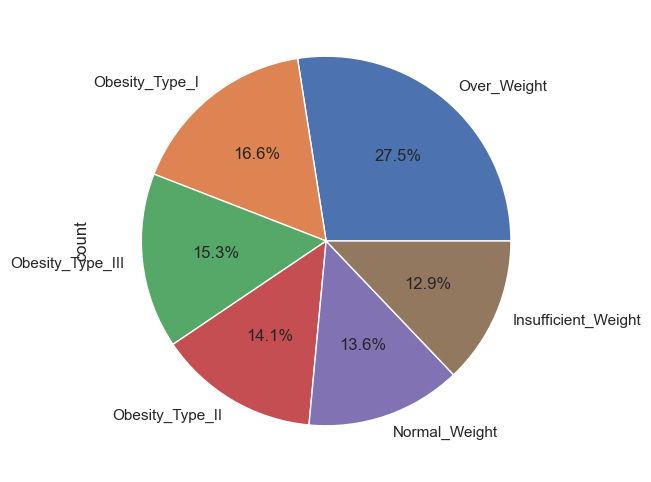

In [14]:
# University of Adelaide 2024-1; 2024-2
import warnings
warnings.filterwarnings("ignore")

sns.set(style = "whitegrid")

plt.figure(figsize=(12, 6))

obe['obesity_cate'].value_counts().plot.pie(explode=[0 for _ in obe['obesity_cate'].unique()], autopct='%1.1f%%')

plt.show()

The obesity category is quite balanced.

Let's have a look with other numeric data:

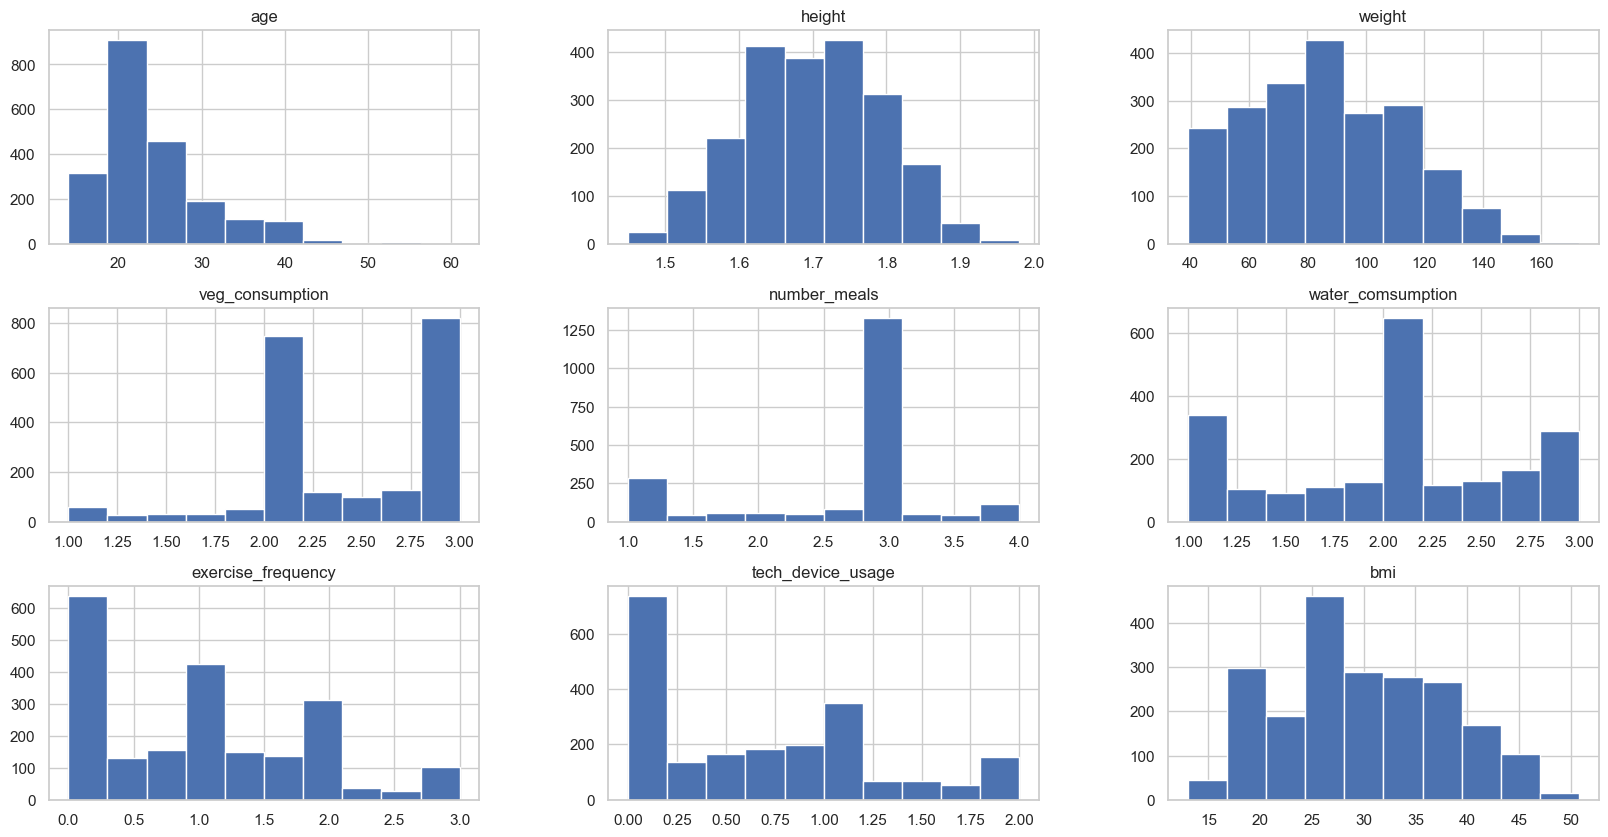

In [15]:
obe.hist(figsize=(20, 10))

plt.show()

There are some skewed for: age, weight, veg_consumption, number_meals, exercise_frequency, tech_device_usage. Need to normalise them by scaling later.

Let's have a look at distribution of these numeric variables:

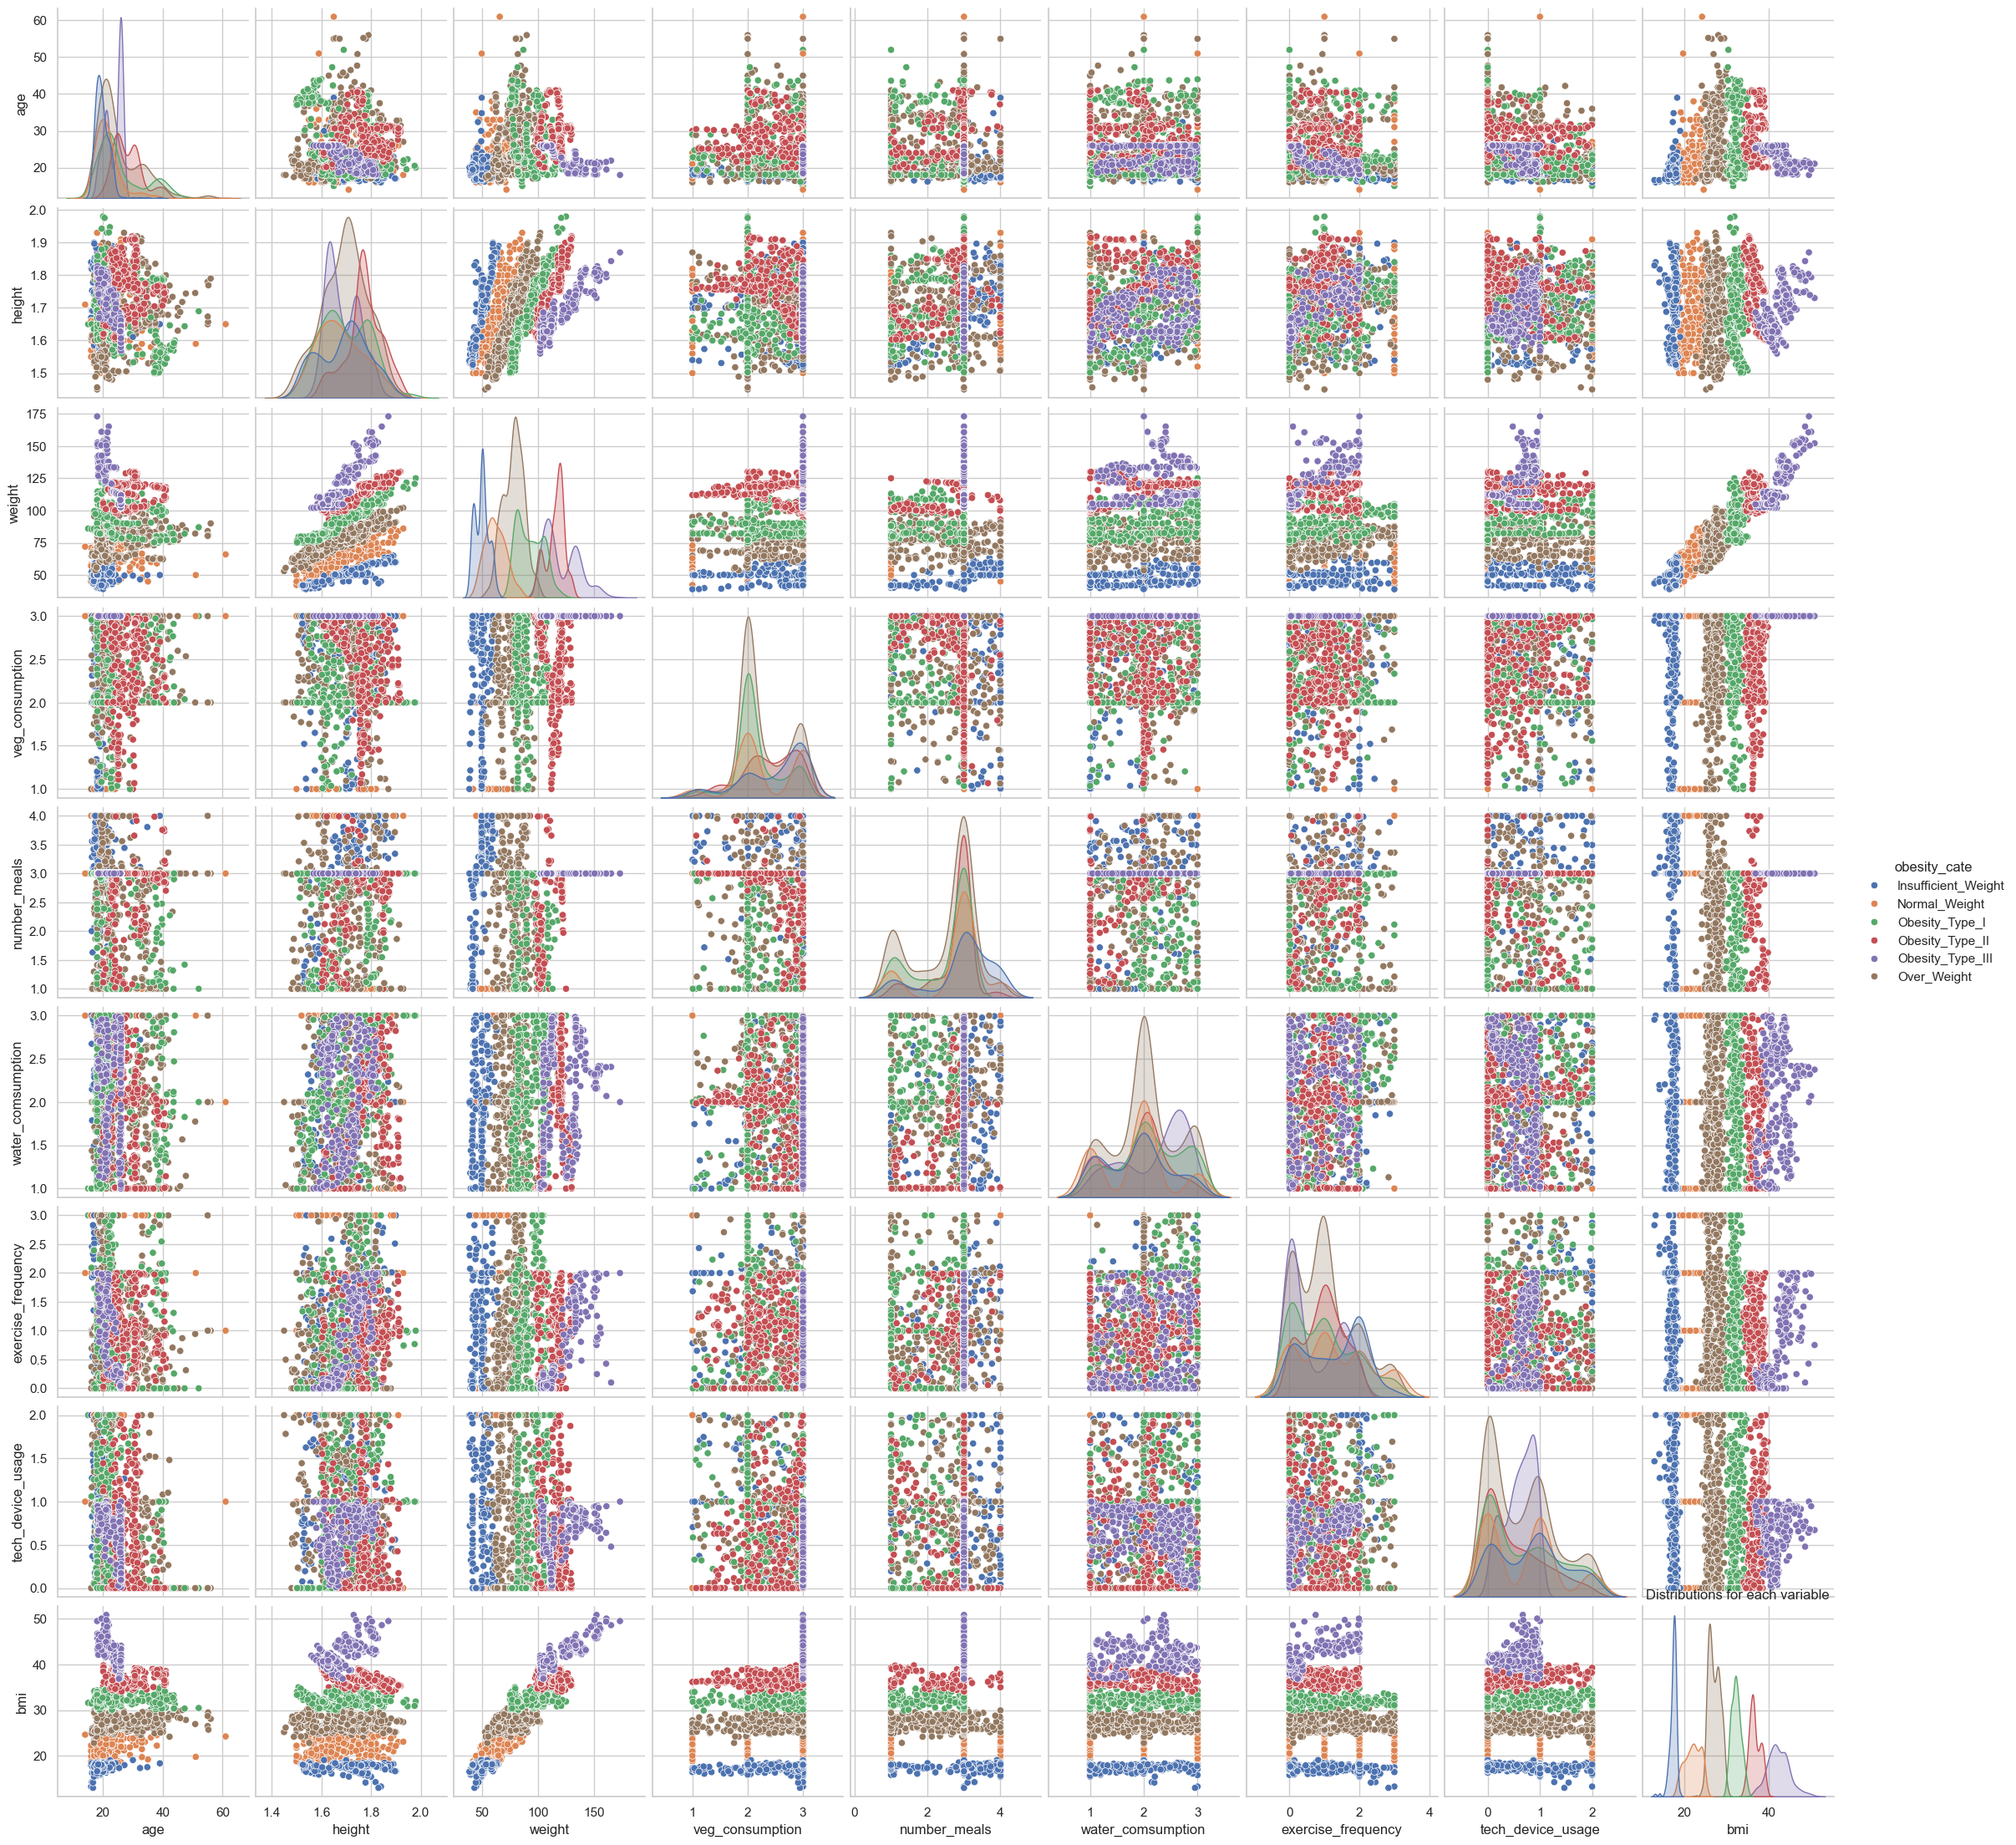

In [16]:
sns.pairplot(data=obe, hue="obesity_cate")

plt.title('Distributions for each variable')

plt.show()

Obesity seems to be affected by weight only.

Besides weight, it seems other combinations with weight also impact to obesity:
* vegetable consumption
* water consumption
* exercise frequency
* technology device usage time

Let's check correlation between numeric variables:

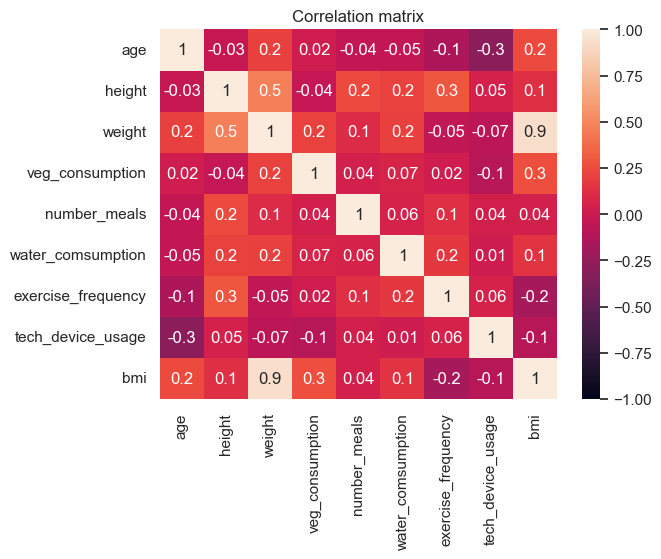

In [17]:
corr = obe.corr(numeric_only=True)

matrix = np.triu(corr)

sns.heatmap(corr, vmax=1.0, vmin=-1.0, fmt='.1g', annot=True)

plt.title('Correlation matrix')

plt.show()

Let's have a look at categorical variables:

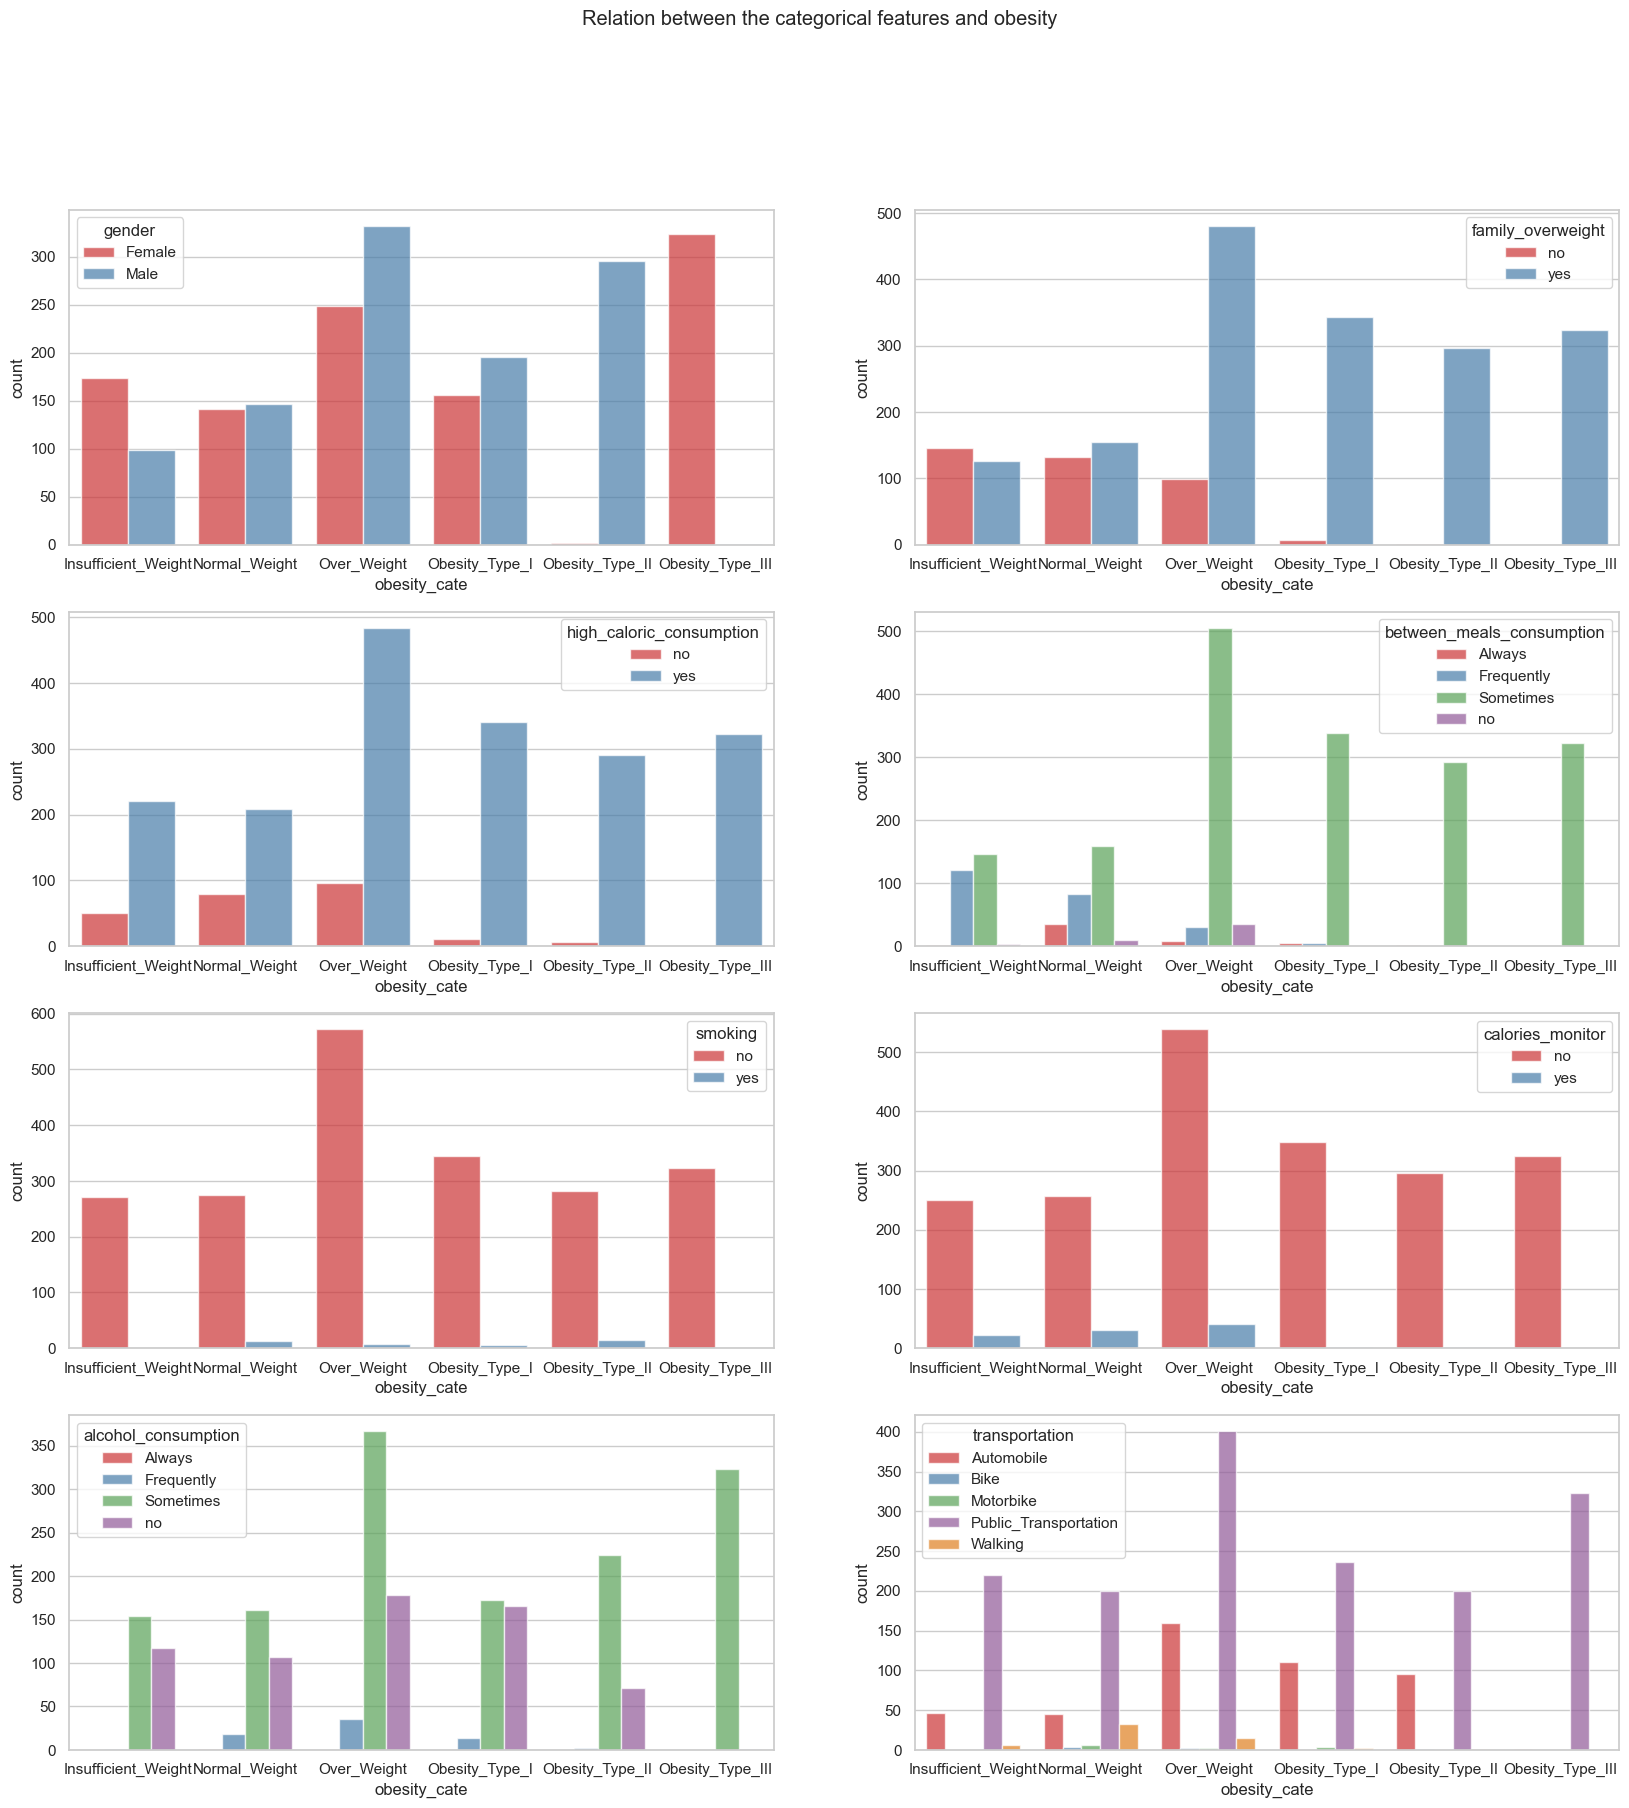

In [18]:
fig, axs = plt.subplots(4, 2, figsize=(20,20))

axs = axs.flatten()

fig.suptitle('Relation between the categorical features and obesity')

cate_var = ['gender', 'family_overweight','high_caloric_consumption' ,'between_meals_consumption','smoking','calories_monitor', 'alcohol_consumption', 'transportation']

obe_order = ['Insufficient_Weight', 'Normal_Weight', 'Over_Weight', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

for ax, i in enumerate(cate_var):
    sns.countplot(x='obesity_cate', alpha=0.7, hue=i, data=obe, ax=axs[ax], palette='Set1', order = obe_order)

There are some relationship between obesity and other categorical variables:
* Females seem to be underweight and obesity type III more than males. Males seems to be overweight and obesity type I and II.
* If a family member is overweight, it seems to impact of obesity of other members.

It seems none relationship between obesity and high caloric food consumption, food consumption between meals, smoking, food calories monitoring, alcohol consumption, and transportation.

### 3. Organise the data for modelling

#### 3.1 Label encoding

In [19]:
# University of Adelaide 2024-1
from sklearn.preprocessing import LabelEncoder

def label_encoder(a):
    le = LabelEncoder()
    return le.fit_transform(a)

label_list = ['gender', 'family_overweight', 'high_caloric_consumption',
              'between_meals_consumption', 'smoking', 'calories_monitor',
              'alcohol_consumption', 'transportation', 'obesity_cate']

obe_encoded = obe.copy().drop(['bmi', 'expected_cate'], axis=1)

for i in label_list:
    obe_encoded[i] = label_encoder(obe_encoded[i])

In [20]:
obe_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   gender                     2111 non-null   int64  
 1   age                        2111 non-null   float64
 2   height                     2111 non-null   float64
 3   weight                     2111 non-null   float64
 4   family_overweight          2111 non-null   int64  
 5   high_caloric_consumption   2111 non-null   int64  
 6   veg_consumption            2111 non-null   float64
 7   number_meals               2111 non-null   float64
 8   between_meals_consumption  2111 non-null   int64  
 9   smoking                    2111 non-null   int64  
 10  water_comsumption          2111 non-null   float64
 11  calories_monitor           2111 non-null   int64  
 12  exercise_frequency         2111 non-null   float64
 13  tech_device_usage          2111 non-null   float

#### 3.2 Normalising the variables

There are many outliers => Use StandardScaler

In [21]:
# University of Adelaide 2024-1; 2024-3

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

all_features = obe_encoded.drop(['obesity_cate'], axis=1).select_dtypes(include=['int64', 'float64']).columns

scaler.fit(obe_encoded[all_features])

scaled_features = scaler.transform(obe_encoded[all_features])

obe_scaled = pd.DataFrame(scaled_features, columns = all_features)

obe_scaled.head()

gender       age    height    weight  family_overweight  \
0 -1.011914 -0.522124 -0.875589 -0.862558           0.472291   
1 -1.011914 -0.522124 -1.947599 -1.168077           0.472291   
2  0.988227 -0.206889  1.054029 -0.366090           0.472291   
3  0.988227  0.423582  1.054029  0.015808          -2.117337   
4  0.988227 -0.364507  0.839627  0.122740          -2.117337   

   high_caloric_consumption  veg_consumption  number_meals  \
0                 -2.759769        -0.785019      0.404153   
1                 -2.759769         1.088342      0.404153   
2                 -2.759769        -0.785019      0.404153   
3                 -2.759769         1.088342      0.404153   
4                 -2.759769        -0.785019     -2.167023   

   between_meals_consumption   smoking  water_comsumption  calories_monitor  \
0                   0.300346 -0.145900          -0.013073         -0.218272   
1                   0.300346  6.853997           1.618759          4.581439   
2                   0.300346 -0.145900          -0.013073         -0.218272   
3                   0.300346 -0.145900          -0.013073         -0.218272   
4                   0.300346 -0.145900          -0.013073         -0.218272   

   exercise_frequency  tech_device_usage  alcohol_consumption  transportation  
0           -1.188039           0.561997             1.419172        0.503337  
1            2.339750          -1.080625            -0.521160        0.503337  
2            1.163820           0.561997            -2.461491        0.503337  
3            1.163820          -1.080625            -2.461491        1.296280  
4           -1.188039          -1.080625            -0.521160        0.503337

#### 3.3 Handling imbalanced dataset

Use over sampling method:

In [22]:
# University of Adelaide 2024-1
from imblearn.combine import SMOTETomek

from imblearn.under_sampling import NearMiss

X = obe_scaled

y = obe_encoded.obesity_cate

smk = SMOTETomek(random_state=1848722)

X_res,y_res=smk.fit_resample(X,y)

X_res.shape,y_res.shape

((3460, 16), (3460,))

In [23]:
from collections import Counter

print('Original dataset shape {}'.format(Counter(y)))

print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({5: 580, 2: 351, 4: 324, 3: 297, 1: 287, 0: 272})
Resampled dataset shape Counter({3: 580, 4: 580, 0: 579, 2: 577, 1: 573, 5: 571})


#### 3.4 Spliting data for training and testing

After rebalancing the data, we should use the recommended size is 20% test 80% train randomly.

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1848722)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1688, 16), (423, 16), (1688,), (423,))

### 4. Implement prediction models

We choose to implement 2 prediction models below:
* Random Forest (RF): for classification, supports binary and multiclass labels, along with continuous and categorical features (University of Adelaide 2024-4).
* Support Vector Machine (SVM or SVC): for classification and outlier detection with high-dimensional spaces and handle. We use Soft SVM for balance classification errors while maximising the margin for accurate classification (University of Adelaide 2024-1; 2024-3). 

#### 4.1 Soft SVM

In [34]:
from sklearn.svm import SVC

soft_svm_model = SVC(random_state = 1848722)

#### 4.2 RF

In [35]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state = 1848722)

### 5. Train prediction models

#### 5.1 Soft SVM

In [36]:
soft_svm_model.fit(X_train, y_train)

SVC(random_state=1848722)

#### 5.2 RF

In [37]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1848722)

### 6. Test prediction models and show results

For better validation, we use K-fold validation to reduce bias, enhance model performance, and ensure every data point contributes to training and testing dataset (University of Adelaide 2024-5).







#### 6.1 Soft SVM

In [39]:
from sklearn.model_selection import cross_val_score

svm_accuracies = cross_val_score(soft_svm_model, X_train, y_train, cv=5)

print("Train Score:",np.mean(svm_accuracies))
print("Test Score:", soft_svm_model.score(X_test,y_test))

Train Score: 0.8945604270187699
Test Score: 0.8959810874704491


Accuracies of Soft SVM training and testing data are 90% - good classification. Testing score is better than training score =>  little to no overfitting.

#### 6.2 RF

In [40]:
rf_accuracies = cross_val_score(rf_model, X_train, y_train, cv=5)

print("Train Score:",np.mean(rf_accuracies))
print("Test Score:", rf_model.score(X_test,y_test))

Train Score: 0.9567503028813231
Test Score: 0.9598108747044918


Accuracies of RF training and testing data are 96% - better classification than Soft SVM. Testing score is better than training score =>  little to no overfitting.

### 7. Compare the results from all candidate models, choose the best model, justify your choice and discuss the results

#### 7.1 Soft SVM

In [43]:
from sklearn.metrics import accuracy_score, classification_report

y_svm_pred = soft_svm_model.predict(X_test)

svm_acc = accuracy_score(y_test, y_svm_pred)
svm_report = classification_report(y_test, y_svm_pred)
print(f"Accuracy: {svm_acc}")
print("Classification Report:")
print(svm_report)


Accuracy: 0.8959810874704491
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.92        53
           1       0.73      0.70      0.72        61
           2       0.97      0.88      0.92        65
           3       0.96      0.98      0.97        56
           4       1.00      0.97      0.99        73
           5       0.85      0.90      0.87       115

    accuracy                           0.90       423
   macro avg       0.90      0.89      0.90       423
weighted avg       0.90      0.90      0.90       423



#### 7.2 RF

In [44]:
y_rf_pred = rf_model.predict(X_test)

rf_acc = accuracy_score(y_test, y_rf_pred)
rf_report = classification_report(y_test, y_rf_pred)
print(f"Accuracy: {rf_acc}")
print("Classification Report:")
print(rf_report)


Accuracy: 0.9598108747044918
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        53
           1       0.86      0.93      0.90        61
           2       1.00      0.94      0.97        65
           3       0.98      0.98      0.98        56
           4       1.00      0.99      0.99        73
           5       0.94      0.97      0.95       115

    accuracy                           0.96       423
   macro avg       0.96      0.96      0.96       423
weighted avg       0.96      0.96      0.96       423



#### The best model is Random Forest (RF)

When we compared all the metrics, RF performs better Soft SVM in:
* RF's accuracy 96% > Soft SVM's 90%
* RF's' precision and recall across all classes > Soft SVM's
* RF's F1-scores are stable across all classes => a well-balanced precision-recall trade-off

### 8. Describe appropriate recommendations

#### 8.1 Importance of each features

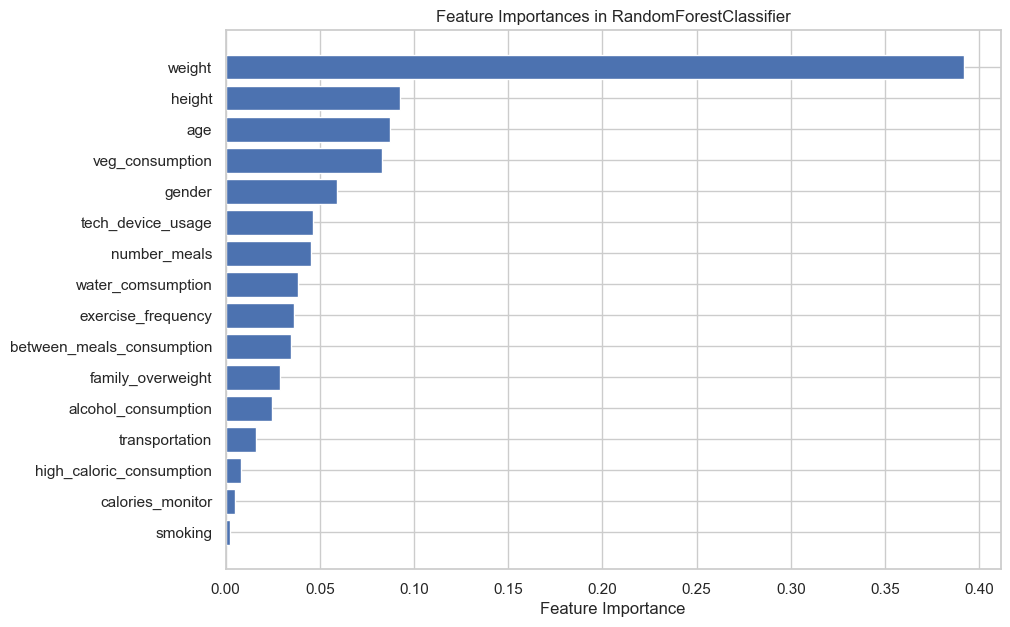

In [45]:
feature_names = rf_model.feature_names_in_

feature_impt = rf_model.feature_importances_

feature_sorted = np.argsort(feature_impt)[::-1]

plt.figure(figsize=(10, 7))

plt.barh(range(len(feature_sorted)), [feature_impt[i] for i in feature_sorted], align='center')
plt.yticks(range(len(feature_sorted)), [feature_names[i] for i in feature_sorted])
plt.gca().invert_yaxis()
plt.title("Feature Importances in RandomForestClassifier")
plt.xlabel("Feature Importance")
plt.show()

#### 8.2 Recommendation

While other features' importance are below 0.1, weight is the most influenced to obesity outcomes with 0.39 value => Prioritise weight management to combat obesity effectively.

Let's have a look of what affects to weight:

In [58]:
correlation_matrix = obe_encoded.drop(['obesity_cate'], axis=1).corr()

weight_correlations = correlation_matrix['weight'].sort_values(ascending=False)

print(weight_correlations)

weight                       1.000000
family_overweight            0.496820
height                       0.463136
between_meals_consumption    0.287493
high_caloric_consumption     0.272300
veg_consumption              0.216125
age                          0.202560
water_comsumption            0.200575
gender                       0.161668
number_meals                 0.107469
smoking                      0.025746
transportation               0.004610
exercise_frequency          -0.051436
tech_device_usage           -0.071561
calories_monitor            -0.201906
alcohol_consumption         -0.206677
Name: weight, dtype: float64


With family lifestyle and height correlates with weights, government should raise awareness to residents of addressing family habits and height-weight balance to decrease obesity. In addtion,  educating on decreasing of eating food between meals, high caloric food, and increasing on vegetable consumptions could help to control weight.

### 9. Reflect on what you have learned by completing this assignment

After this assignment, I learn to better planning on time management because analysing this big data really takes time: develop a sense of data, understand different models and metrics. Moreover, I understand more about the procedure from loading data to analysing and recommending insights for clients.

### 10. References

University of Adelaide 2024-1, COMP_SCI_7306 Mining Big Data - Module 3 Live Sessions: Naive Bayes & Logistic Regression - Income_Evalutation-1, Python Jupyter notebook, The University of Adelaide, viewed 31 March 2024workshop 1 <https://myuni.adelaide.edu.au/courses/91968/files/14319189?wrap=1>.

University of Adelaide 2024-2, COMP_SCI_7306 Mining Big Data - Module 3 Live Sessions: Naive Bayes & Logistic Regression - iris-data-visualization, Python Jupyter notebook, The University of Adelaide, viewed 31 March 2024workshop 1 <https://myuni.adelaide.edu.au/courses/91968/files/14319109?wrap=1>.

University of Adelaide 2024-3, COMP_SCI_7306 Mining Big Data - Module 4 Live Sessions: Regression & Regularisation - house-price-prediction-ridge-lasso-regression Solutions, Python Jupyter notebook, The University of Adelaide, viewed 31 March 2024workshop 1 <https://myuni.adelaide.edu.au/courses/91968/files/14319112?wrap=1>.

University of Adelaide 2024-4, COMP_SCI_7306 Mining Big Data - Module 2 Live Sessions: Visualisation & Regression - W2_Solutions_Iris, Python code, The University of Adelaide, viewed 31 March 2024workshop 1 <https://myuni.adelaide.edu.au/courses/91968/pages/module-2-live-sessions-visualisation-and-regression?module_item_id=3274605>.

University of Adelaide 2024-5, STATS_7022 Data Science PG - Week 4: LDA, QDA, and NB, PowerPoint slides, The University of Adelaide, viewed 31 March 2024, <https://myuni.adelaide.edu.au/courses/90956/files/144 67368?wrap=1>.